In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [30]:
#Reading Data
df_price = pd.read_excel("/Users/hunglun/Downloads/prices.xlsx")
df_price.set_index("Date",inplace = True)

In [31]:
#Renaming Column
df_price = df_price.rename(columns = {"FB US Equity":"FB", "AAPL US Equity":"AAPL","AMZN US Equity":"AMZN","GOOG US Equity":"GOOG","NFLX US Equity":"NFLX"})


In [32]:
#Question 1
df_return = df_price.pct_change(1).iloc[1:,:]
df_return

,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,
2019-01-02,0.035014,0.001141,0.024741,0.000000,0.009888
2019-01-03,-0.029039,-0.099595,-0.025242,0.013226,-0.028484
2019-01-04,0.047138,0.042675,0.050064,0.097235,0.053786
2019-01-07,0.000725,-0.002212,0.034353,0.059717,-0.002167
2019-01-08,0.032452,0.019063,0.016612,0.015634,0.007385
...,...,...,...,...,...
2020-12-24,-0.002648,0.007712,-0.003949,-0.000991,0.003735
2020-12-28,0.035901,0.035766,0.035071,0.010020,0.021416
2020-12-29,-0.000794,-0.013315,0.011584,0.022634,-0.009780


In [33]:
#Question 2 
df_return.corr()

,FB,AAPL,AMZN,NFLX,GOOG
FB,1.000000,0.691989,0.665265,0.522210,0.737472
AAPL,0.691989,1.000000,0.670520,0.503074,0.700623
AMZN,0.665265,0.670520,1.000000,0.631316,0.661136
NFLX,0.522210,0.503074,0.631316,1.000000,0.502176
GOOG,0.737472,0.700623,0.661136,0.502176,1.000000


In [61]:
#Question 3
initial_investment = 1000000
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
cov_matrix = df_return.cov()
avg_rets = df_return.mean()
port_stdev = df_return['portfolio_daily_returns'].std()
mean_investment = (1+port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev
conf_level1 = 0.01
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)
var_1d1 = initial_investment - cutoff1
var_1d1

42337.32827719336

In [35]:
#Question 4
df_return['portfolio_daily_returns'] = df_return.dot(weights)
df_return

,FB,AAPL,AMZN,NFLX,GOOG,portfolio_daily_returns
Date,,,,,,
2019-01-02,0.035014,0.001141,0.024741,0.000000,0.009888,0.014157
2019-01-03,-0.029039,-0.099595,-0.025242,0.013226,-0.028484,-0.033827
2019-01-04,0.047138,0.042675,0.050064,0.097235,0.053786,0.058180
2019-01-07,0.000725,-0.002212,0.034353,0.059717,-0.002167,0.018083
2019-01-08,0.032452,0.019063,0.016612,0.015634,0.007385,0.018229
...,...,...,...,...,...,...
2020-12-24,-0.002648,0.007712,-0.003949,-0.000991,0.003735,0.000772
2020-12-28,0.035901,0.035766,0.035071,0.010020,0.021416,0.027635
2020-12-29,-0.000794,-0.013315,0.011584,0.022634,-0.009780,0.002066


In [60]:
df_return['portfolio_daily_returns'].mean()

0.001826077398085901

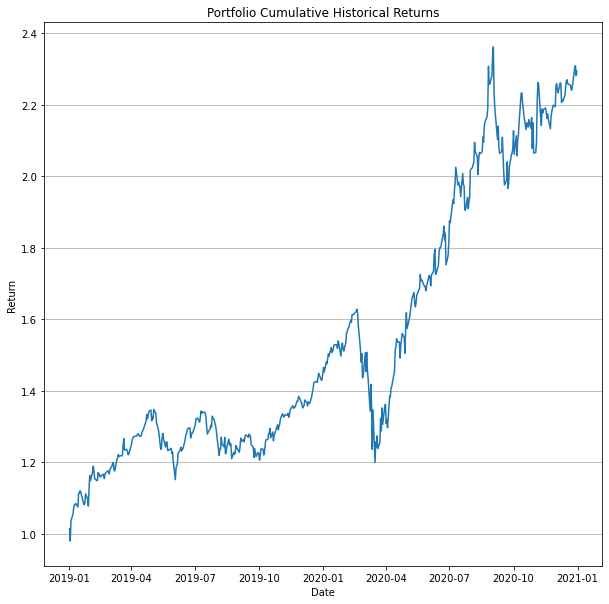

In [44]:
Cumulative_returns_daily = (1+df_return['portfolio_daily_returns']).cumprod()
Cumulative_returns_daily
fig = plt.figure(figsize =(10,10))
plt.title("Portfolio Cumulative Historical Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(axis = 'y')
plt.plot(Cumulative_returns_daily)

In [45]:
Cumulative_returns_daily

Date
2019-01-02    1.014157
2019-01-03    0.979851
2019-01-04    1.036859
2019-01-07    1.055608
2019-01-08    1.074851
                ...   
2020-12-24    2.242778
2020-12-28    2.304757
2020-12-29    2.309518
2020-12-30    2.281852
2020-12-31    2.293769
Name: portfolio_daily_returns, Length: 505, dtype: float64

In [37]:
#Question 5
Frequency = []
Frequency.append(len(df_return[(df_return["portfolio_daily_returns"] < -0.01)]))
Frequency.append(len(df_return[(df_return["portfolio_daily_returns"] < -0.005) & (df_return["portfolio_daily_returns"] > -0.01)]))
Frequency.append(len(df_return[(df_return["portfolio_daily_returns"] < 0) & (df_return["portfolio_daily_returns"] > -0.005)]))
Frequency.append(len(df_return[(df_return["portfolio_daily_returns"] < 0.005) & (df_return["portfolio_daily_returns"] > 0)]))
Frequency.append(len(df_return[(df_return["portfolio_daily_returns"] < 0.01) & (df_return["portfolio_daily_returns"] > 0.005)]))
Frequency.append(len(df_return[(df_return["portfolio_daily_returns"] > 0.01)]))



In [39]:
Frequency

[94, 52, 56, 91, 70, 142]

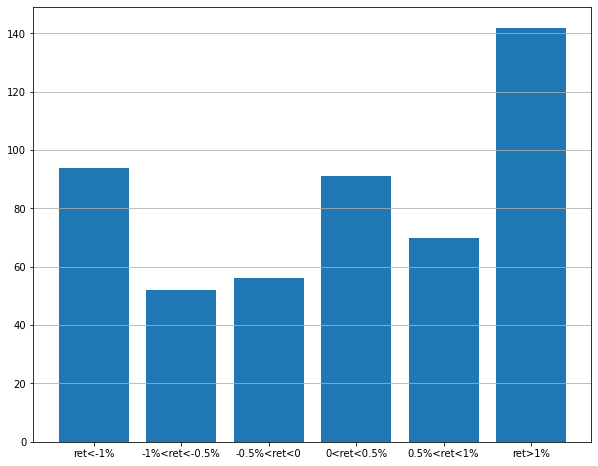

In [40]:
x = ["ret<-1%","-1%<ret<-0.5%","-0.5%<ret<0","0<ret<0.5%","0.5%<ret<1%","ret>1%"]
y = Frequency
fig = plt.figure(figsize = (10, 8))
plt.bar(x,y)
plt.grid(axis = 'y')